# Pandas

The Pandas library is essentially a one-stop shop for common workflows in data science. It provides the basic toolset needed for data cleaning, feature engineering, statistical analysis, and visualizations in one place. Sometimes the basic toolset is enough, but in cases where it is not, the pandas library is built on top of numpy which allows easy integration with more specialized libraries like scikit-learn. Essentially, as long as it makes sense to represent your data in tables you should consider using pandas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Getting Data
The main data structure of Pandas is the DataFrame, which is a 2-D labeled, table like structure. It is composed of several Data Series which are 1-D homogeneous-typed arrays. Understanding how to work with these two structures is the core of working with Pandas. The first step is acquiring a dataframe (or series) to work with.

One way to get a dataframe is by importing from another data source. Pandas supports the ability to work with many common file formats (csv, excel, json, hdf5, ...) and databases. The cell below pulls a csv from the specified url and imports it in as a Pandas DataFrame.

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

### Exercise 1
Let's experiment creating a dataframe from JSON files. The simulated datasets are available in the module folder as `simulated_form<id>.json` files. Each file is the same dataset, but in a different json format. Use the `read_json` Pandas method to load three or more of the files.

In [3]:
df1 = None # fill in these lines
df2 = None
df3 = None

for df in [df1, df2, df3]:
    print(df.head())

AttributeError: 'NoneType' object has no attribute 'head'

Another way to acquire DataFrames or Series is to literally construct them from existing collections. Base collections could be native Python lists, numpy arrays, or dictionaries.

In [4]:
pd.Series([1, 3, 9])

0    1
1    3
2    9
dtype: int64

In [5]:
pd.DataFrame(np.random.randn(10,4), columns = ['A', 'B', 'C', 'D'])

,A,B,C,D
0,-1.351002,-0.028942,-0.004894,-0.312579
1,0.667363,-0.443306,-0.235945,0.654681
2,-0.541925,-0.685435,0.408462,-0.469905
3,-0.134159,0.670194,0.596714,-0.827568
4,-0.806077,-1.087923,1.118868,1.999115
5,1.768961,0.584652,0.480645,-2.678337
6,1.521456,0.343302,-0.323542,0.526522
7,-0.117941,-0.884444,1.007828,0.478262
8,-0.333456,0.701991,0.354643,0.377044
9,0.700291,0.108247,0.441762,2.028810


In [6]:
pd.DataFrame({
    "PI": 3.14,
    "Radius": np.arange(5),
    "Size": pd.Categorical(["S", "S", "S", "L", "L"])
})

,PI,Radius,Size
0,3.14,0,S
1,3.14,1,S
2,3.14,2,S
3,3.14,3,L
4,3.14,4,L


## Exploring Data

After you've created a data frame the next natural step is exploring it's contents. There are several helpful methods that can be used for viewing different attributes. Below are just a few.

In [7]:
print(f'Shape = {iris.shape}')
print(f'Index = {iris.index}')
print(f'Columns = {iris.columns}')

Shape = (150, 5)
Index = RangeIndex(start=0, stop=150, step=1)
Columns = Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [8]:
print(iris.head())
print(iris.tail())
print(iris.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066   

### Exercise 2

Import the (red) wine quality datasets and answer the following questions. 
1. How many columns and rows are there? 
2. How many columns deal with measures of acidity? 
3. What's the most alcholic wine available?

In [9]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = None # insert your code here

## Selecting Data

Once the dataframe is created and a basic understanding of its contents established, the next most common steps are to examine subsets or perform transformations. In both cases, the ability to select specific elements of the DataFrame is key.

There are four primary methods for selecting elements: `.loc()`, `.iloc()`, `[]`, and, in some cases, direct attribute access with `.`. The most efficient and explicit methods are`.loc()` and `.iloc()` for label and index based selections, respectively. Using `[]` and `.` is great for interactive work but is generally not recommended for production quality code. Here's a few examples with attribute access and indexing/slicing.

In [10]:
iris.species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [11]:
iris['species'].head() # this will work

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [12]:
iris[['petal_length', 'petal_width']].head() # so will this

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [13]:
iris['petal_length':] # this will not

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [petal_length] of <class 'str'>

In [14]:
iris[0] # this will fail

KeyError: 0

In [15]:
iris[:5] # this will not

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
iris['species'][:5] # combining works

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

From the above you can see how the shorthand syntax might be useful. Below we'll flesh out the use of the selection by label and index methods. Both methods essentially take the same set of five possible input types:
1. a single label/index
2. a list of labels/indicies
3. a slice of labels/indicies
4. a boolean array
5. a callable object

They also can accept the row and column labels simultaneously. If only one is specified, it is assumed to identify the rows.

In [17]:
iris.loc[:5, 'species']

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: species, dtype: object

In [18]:
iris.loc[:5, ['petal_length', 'petal_width']]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4


In [19]:
iris.loc[:5, 'petal_length':]

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
5,1.7,0.4,setosa


In [20]:
iris.loc[iris.species == 'versicolor', :].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [21]:
(iris.loc[lambda df : df.species == 'versicolor', :]
    .loc[lambda df : df.petal_length < 4.5, :]
    .head())

,sepal_length,sepal_width,petal_length,petal_width,species
53,5.5,2.3,4.0,1.3,versicolor
57,4.9,2.4,3.3,1.0,versicolor
59,5.2,2.7,3.9,1.4,versicolor
60,5.0,2.0,3.5,1.0,versicolor
61,5.9,3.0,4.2,1.5,versicolor


In [22]:
iris.iloc[-5:,-3:]

,petal_length,petal_width,species
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica
149,5.1,1.8,virginica


## Operating on Data

In order to process your data you'll need to know how to perform common statistical operations, apply custom functions, and create new dataframes (or modify the existing one). This includes handling missing data, computing statistics, reshaping (pivot, melt, transpose, etc.). Most of the operations are straightforward to use if you're familiar with the routine you're trying to apply. We'll explore a few examples here.

In [23]:
poor_quality = pd.DataFrame([[1, np.nan], [2, 3.14]], columns = ['A', 'B'])
poor_quality.isna()

,A,B
0,False,True
1,False,False


In [24]:
poor_quality.fillna(value = poor_quality.B.mean())

,A,B
0,1,3.14
1,2,3.14


In [25]:
poor_quality.dropna()

,A,B
1,2,3.14


In [26]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [27]:
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [28]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [29]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [30]:
iris.iloc[:,:-1].apply(np.sum, axis=0)

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

In [31]:
iris.iloc[:,:-1].apply(np.sum, axis=1)

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [32]:
iris.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


## Visualizing Data

Underneath the hood, pandas is setup to take advantage of matplotlib's basic functionality. It then exposes that functionality through convenient methods of the DataFrame class. 

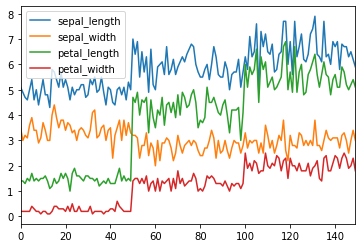

In [34]:
ax = iris.plot()

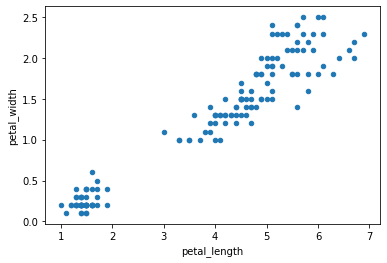

In [41]:
ax = iris.plot(kind = 'scatter', x = 'petal_length', y='petal_width')

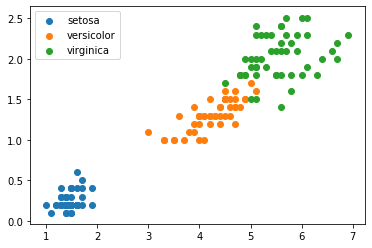

In [46]:
fig, ax = plt.subplots()
species = iris.groupby('species')
for name, df in species:
    ax.scatter(df.petal_length, df.petal_width, label=name)
legend = ax.legend()

### Exercise 3

We've been using the iris dataset to acquiant ourselves with Pandas, but only started with the wine data set. Your task now is to utilize all the methods you know to inspect the wine data set. Your goal is to gather ideas for what features or feature combinations might be useful for training a machine learning model to predict the quality of wine.